### Import required libraries

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve

### Load the dataset

In [143]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [144]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (100000, 9)


In [145]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [147]:
df.describe(include=['float64'])

,age,bmi,HbA1c_level
count,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507
std,22.516840,6.636783,1.070672
min,0.080000,10.010000,3.500000
25%,24.000000,23.630000,4.800000
50%,43.000000,27.320000,5.800000
75%,60.000000,29.580000,6.200000
max,80.000000,95.690000,9.000000


## Data preprocessing and Exploratory Data Analysis

In [148]:
# Check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [149]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [150]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']
# Reset index
df = df.reset_index(drop=True)

In [151]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [152]:
# Check for duplicates
df.duplicated().sum()

3854

In [153]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [154]:
df.shape

(96128, 9)

In [155]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [156]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [157]:
# Target variable distribution

print("Distribution of Diabetes status:")
print(df['diabetes'].value_counts())
print("Distribution of Diabetes status in percentage: \n")
print(df['diabetes'].value_counts(normalize=True))

Distribution of Diabetes status:
diabetes
0    87646
1     8482
Name: count, dtype: int64
Distribution of Diabetes status in percentage: 

diabetes
0    0.911763
1    0.088237
Name: proportion, dtype: float64


In [158]:
df['heart_disease'].value_counts()

heart_disease
0    92205
1     3923
Name: count, dtype: int64

In [159]:
df['hypertension'].value_counts()

hypertension
0    88667
1     7461
Name: count, dtype: int64

In [160]:
# Separate columns into categorical and numerical based on their data types

numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns:")
print(numerical_columns)

categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

Categorical columns:
Index(['gender', 'smoking_history'], dtype='object')


In [161]:
## Find the unique values, no of unique and their distribution in the each Categorical/Object column in the dataframe
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print(f"Unique Values: {df[col].nunique()}")
    print(f"Unique Values: {df[col].value_counts()}")
    print("--" * 60)

Column: gender
Unique Values: ['Female' 'Male']
Unique Values: 2
Unique Values: gender
Female    56161
Male      39967
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Column: smoking_history
Unique Values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Unique Values: 6
Unique Values: smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


## Exploratory Data Analysis (EDA) Visualizations:

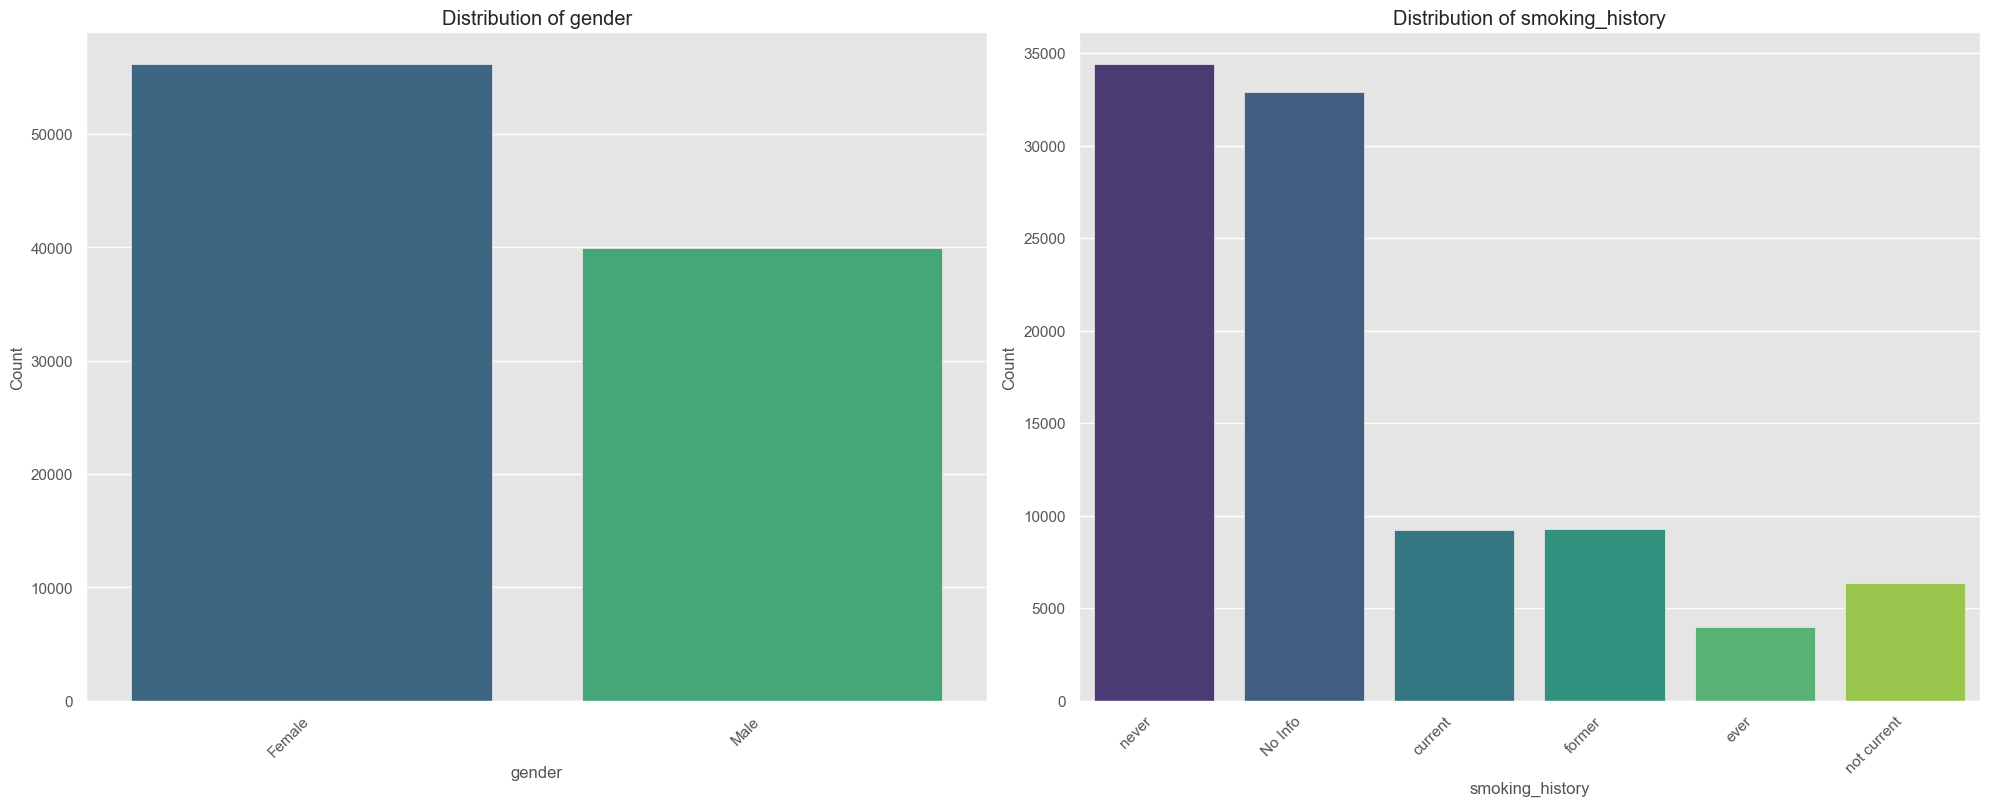

In [162]:
# Set the overall figure size for all the subplots (width=20, height=15)
plt.figure(figsize=(20, 15))
plt.style.use('ggplot')


# Loop through each categorical column and plot its distribution
for i, col in enumerate(categorical_columns):
    # Create a subplot in a 4-row, 2-column grid and place the current plot at position (i + 1)
    
    
    plt.subplot(2, 2, i + 1)

    # Create a count plot (bar chart) for the current categorical column
    sns.countplot(data=df, x=col, palette='viridis')

    # Set the title for the current subplot
    plt.title(f'Distribution of {col}')

    # Label the x-axis with the column name
    plt.xlabel(col)

    # Label the y-axis as 'Count'
    plt.ylabel('Count')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

# Adjust subplot layout to prevent overlapping elements
plt.tight_layout()

# Display all the generated plots
plt.show()

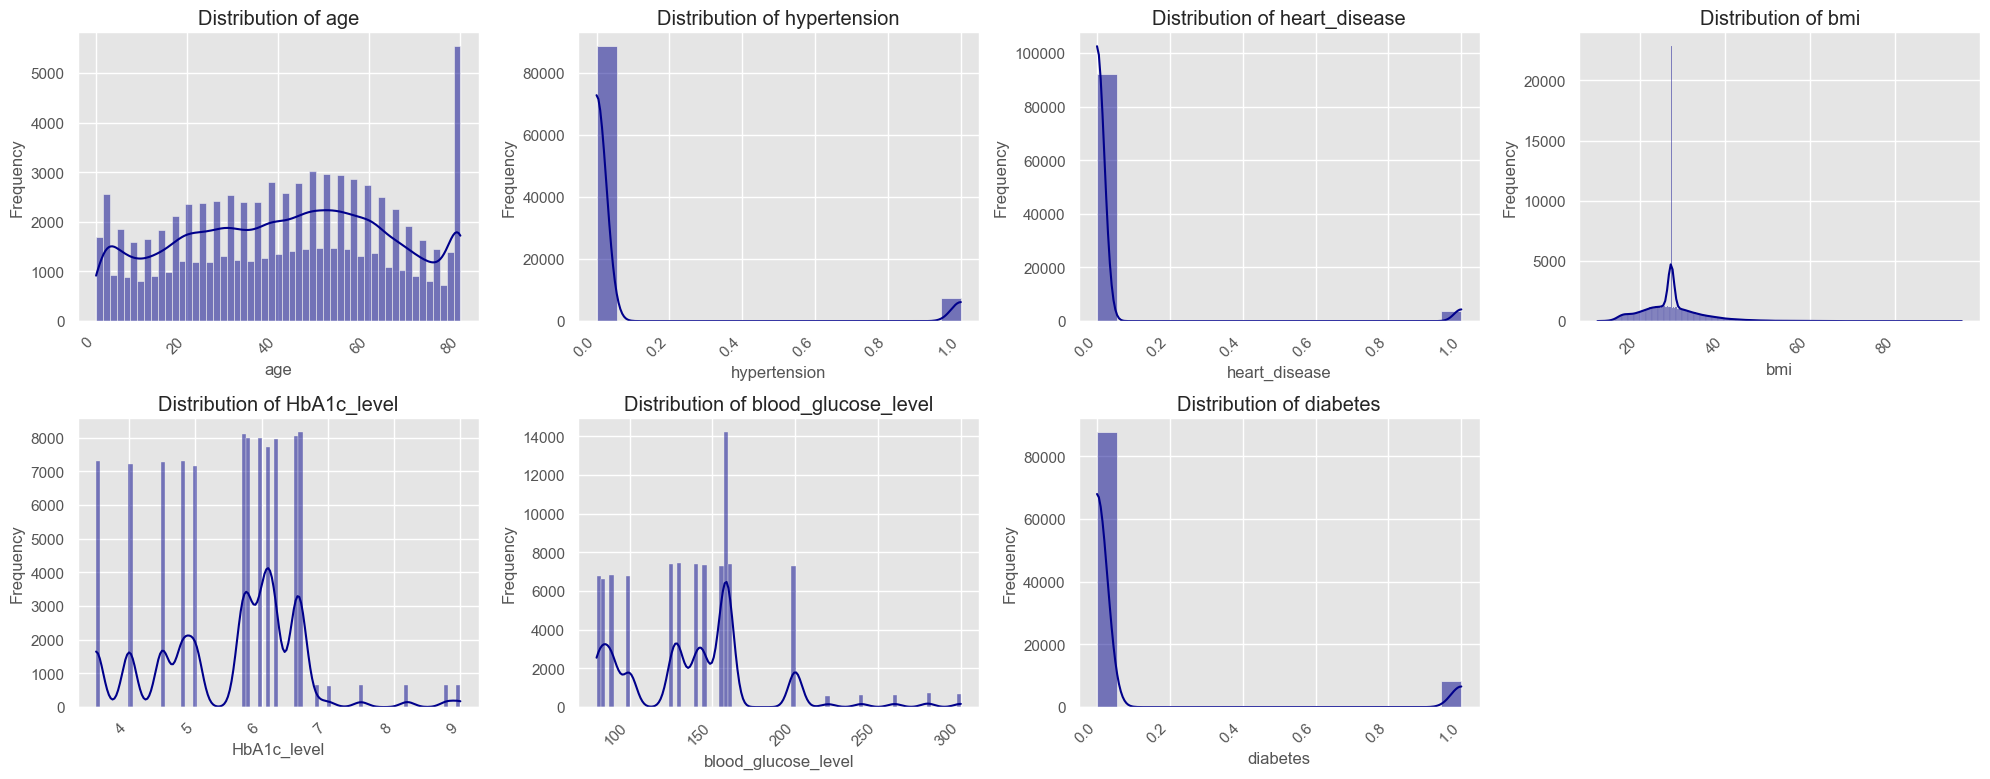

In [163]:
# Set the overall figure size for all numerical variable plots (width=20, height=15)
plt.figure(figsize=(20, 15))
plt.style.use('ggplot')


# Loop through each numerical column and plot its distribution
for i, col in enumerate(numerical_columns):
    # Create a subplot in a 3-row, 3-column grid, and place the current plot at position (i + 1)
    plt.subplot(4, 4, i + 1)

    # Create a histogram with a KDE (Kernel Density Estimate) line to show distribution shape
    sns.histplot(data=df, x=col, kde=True, palette='viridis', color='darkblue')

    # Set the title for the current subplot
    plt.title(f'Distribution of {col}')

    # Label the x-axis with the column name
    plt.xlabel(col)

    # Label the y-axis as 'Frequency'
    plt.ylabel('Frequency')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping of plots and labels
plt.tight_layout()

# Display all the generated plots
plt.show()

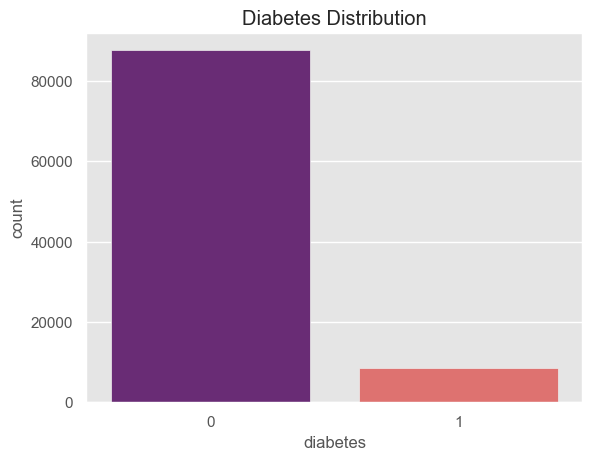

In [164]:
# Count plot for the 'diabetes' variable to verify the distribution
sns.countplot(x='diabetes', data=df, palette='magma')
plt.style.use('ggplot')
plt.title('Diabetes Distribution')
plt.show()

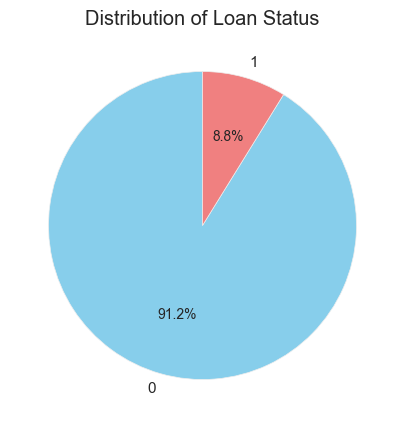

In [165]:
plt.figure(figsize=(15, 5))
df['diabetes'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)

# Set the title of the pie chart
plt.title('Distribution of Loan Status')

# Remove the y-axis label for a cleaner look (not needed in pie charts)
plt.ylabel('')

# Display the chart
plt.show()

## Bivariate Analysis

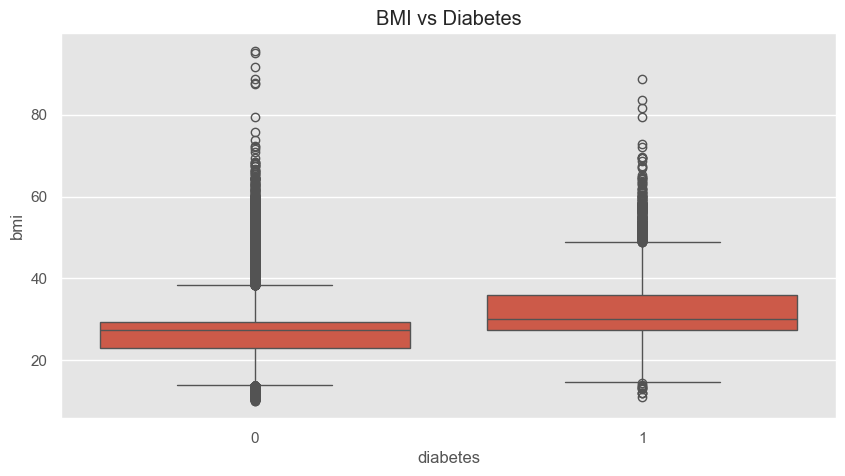

In [166]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

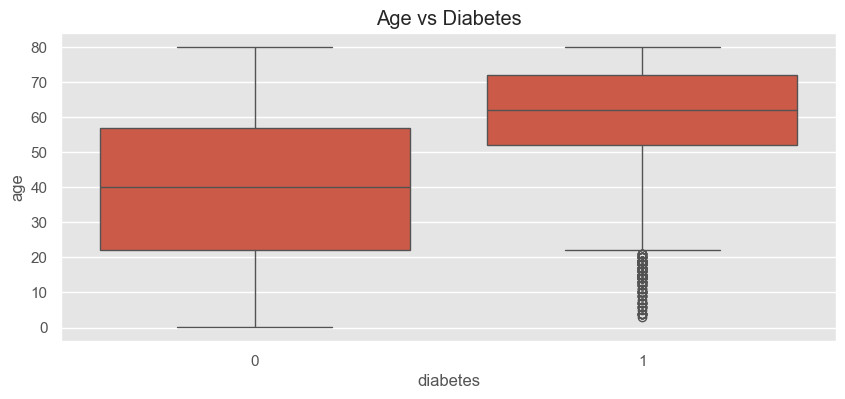

In [167]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

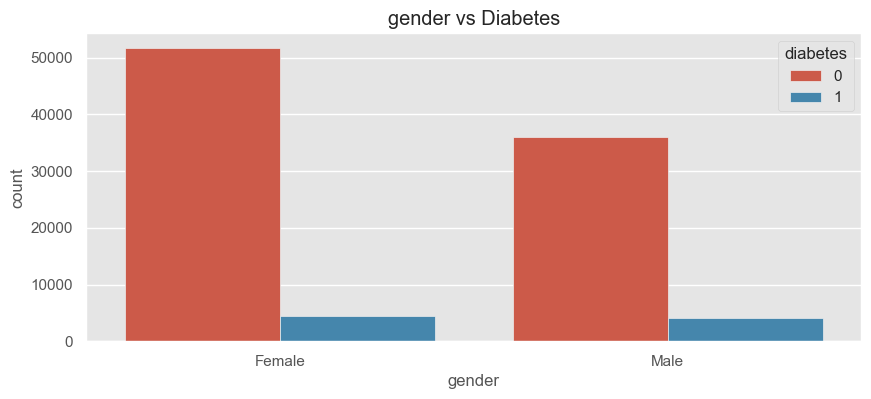

In [168]:
plt.figure(figsize=(10, 4))
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('gender vs Diabetes')
plt.show()

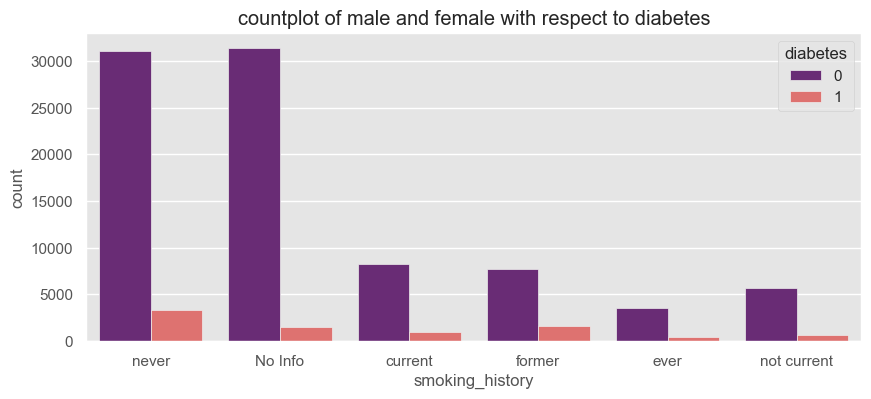

In [169]:
plt.figure(figsize=(10, 4))
sns.countplot(x='smoking_history', hue='diabetes', data=df ,palette='magma' )
plt.title('countplot of male and female with respect to diabetes')
plt.show()

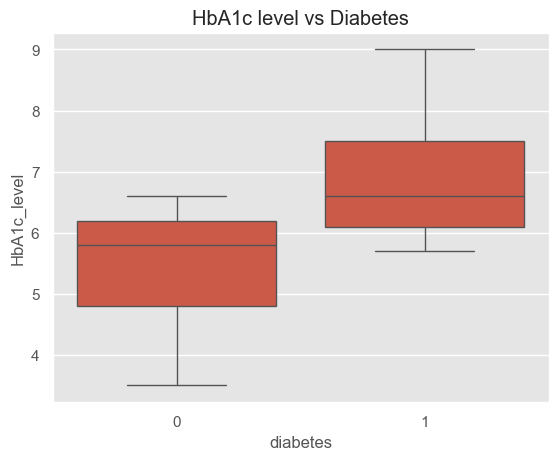

In [170]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

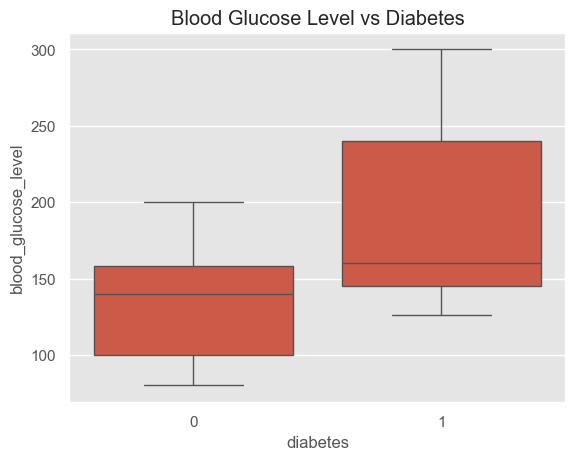

In [171]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

<Figure size 1000x800 with 0 Axes>

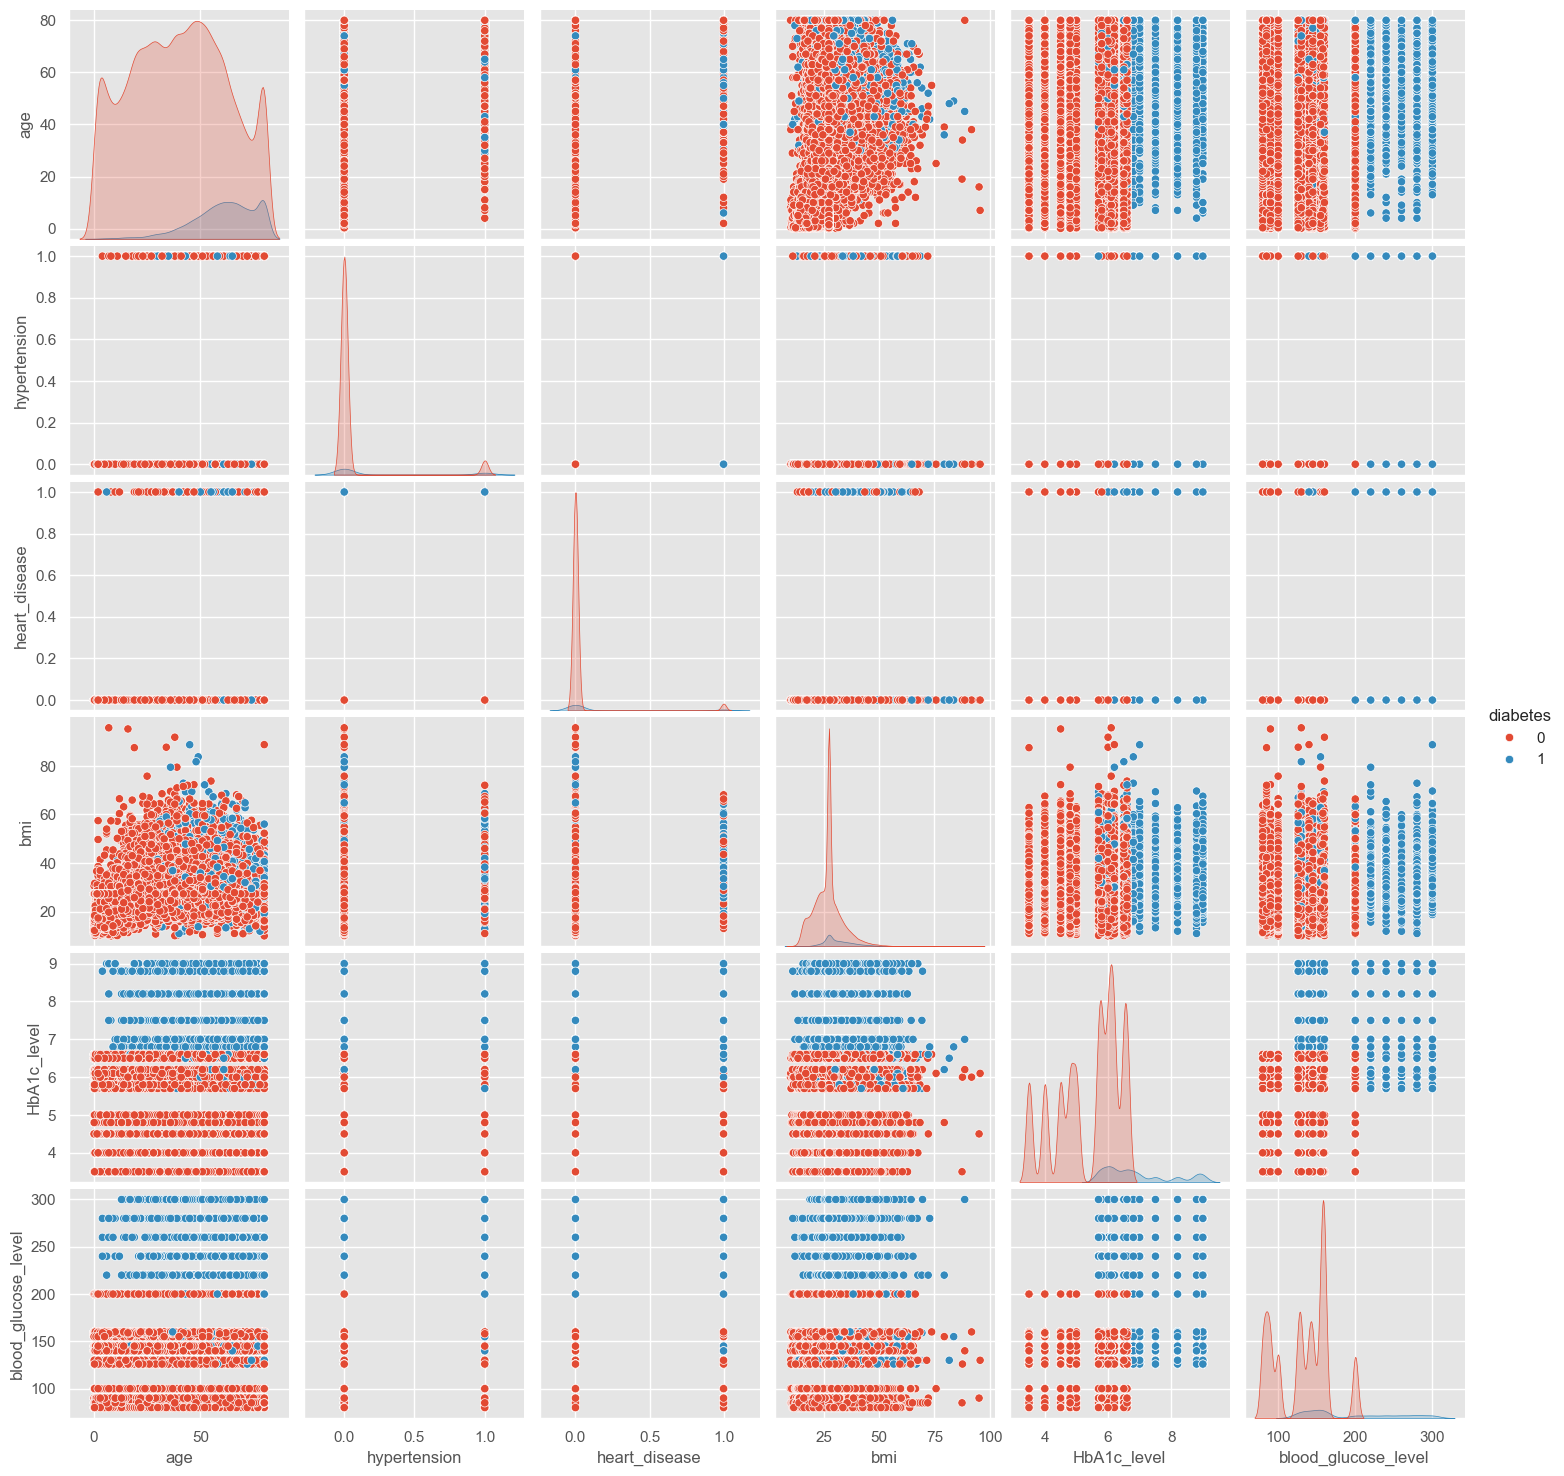

In [172]:
# pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='diabetes')
plt.show()

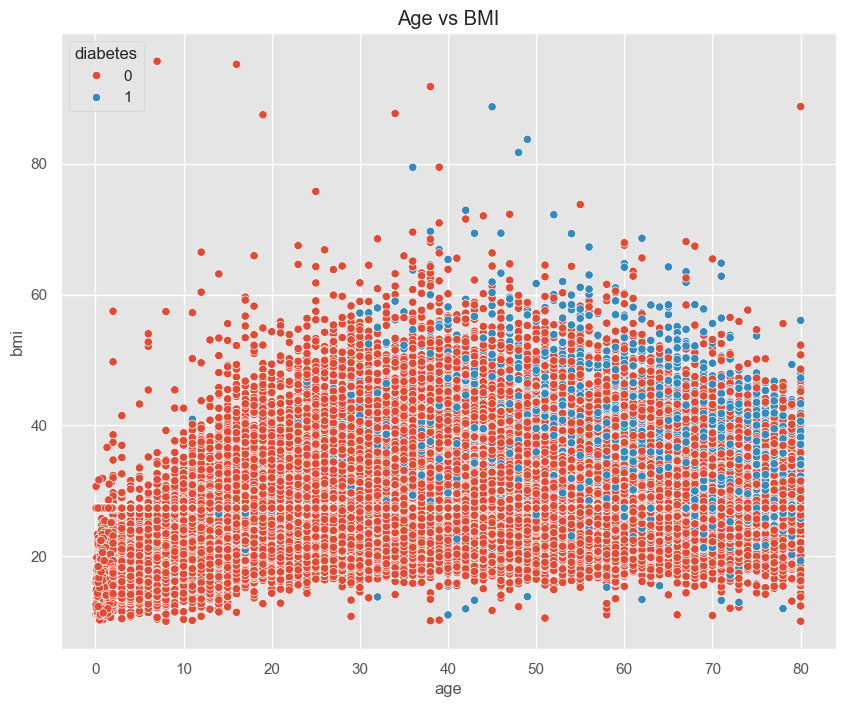

In [173]:
# Scatterplot Age vs BMI colored by Diabetes classification
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

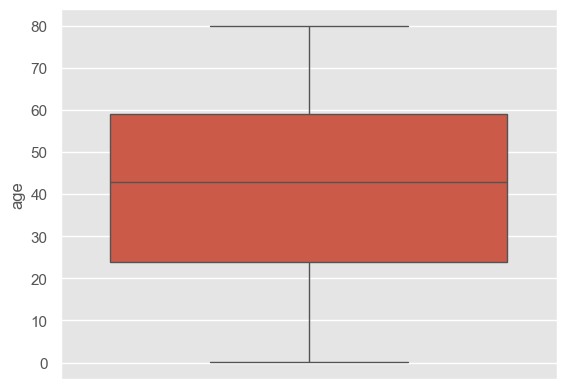

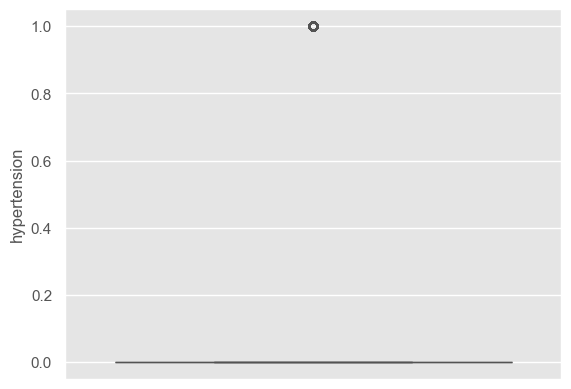

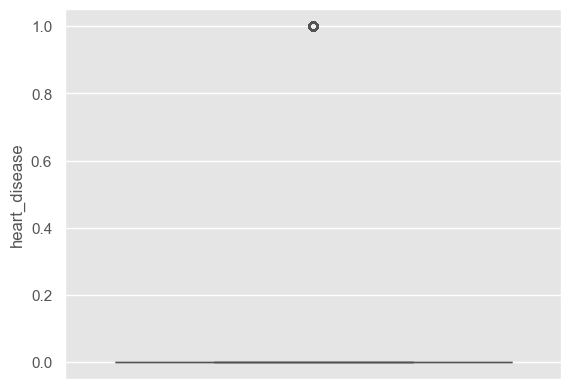

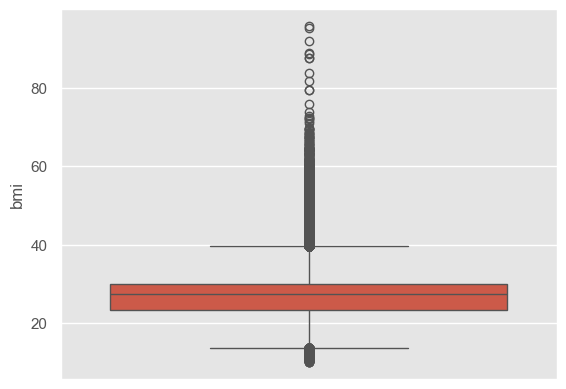

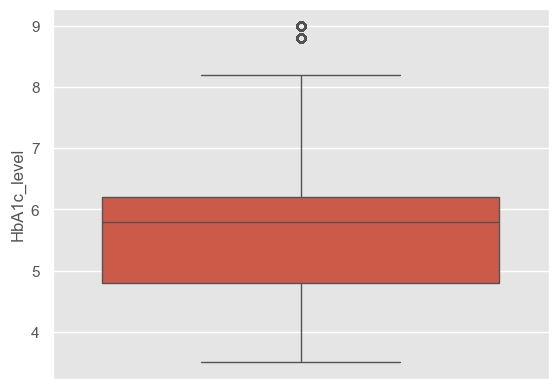

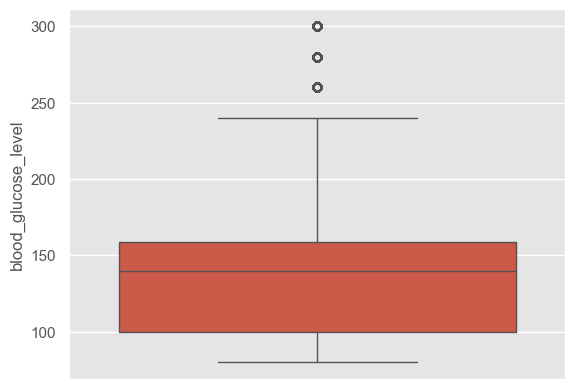

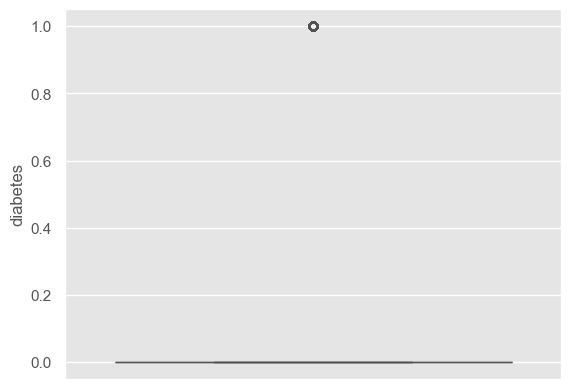

In [174]:
#Checking outlier for numerical columns
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude = ['object']).columns):
    boxplot(i)

## Encoding Categorical values

In [175]:
categorical_columns

Index(['gender', 'smoking_history'], dtype='object')

In [176]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
## One Hot encoder
df_new = pd.get_dummies(df, columns=['gender','smoking_history'], drop_first = True, dtype='int')

## Correlation Matrix

In [178]:
corr = df_new.corr()
print(corr['diabetes'].sort_values(ascending=False))

diabetes                       1.000000
blood_glucose_level            0.424366
HbA1c_level                    0.406446
age                            0.264918
bmi                            0.214951
hypertension                   0.195696
heart_disease                  0.170701
smoking_history_former         0.095474
gender_Male                    0.037837
smoking_history_never          0.023115
smoking_history_ever           0.021922
smoking_history_not current    0.019021
smoking_history_current        0.017018
Name: diabetes, dtype: float64


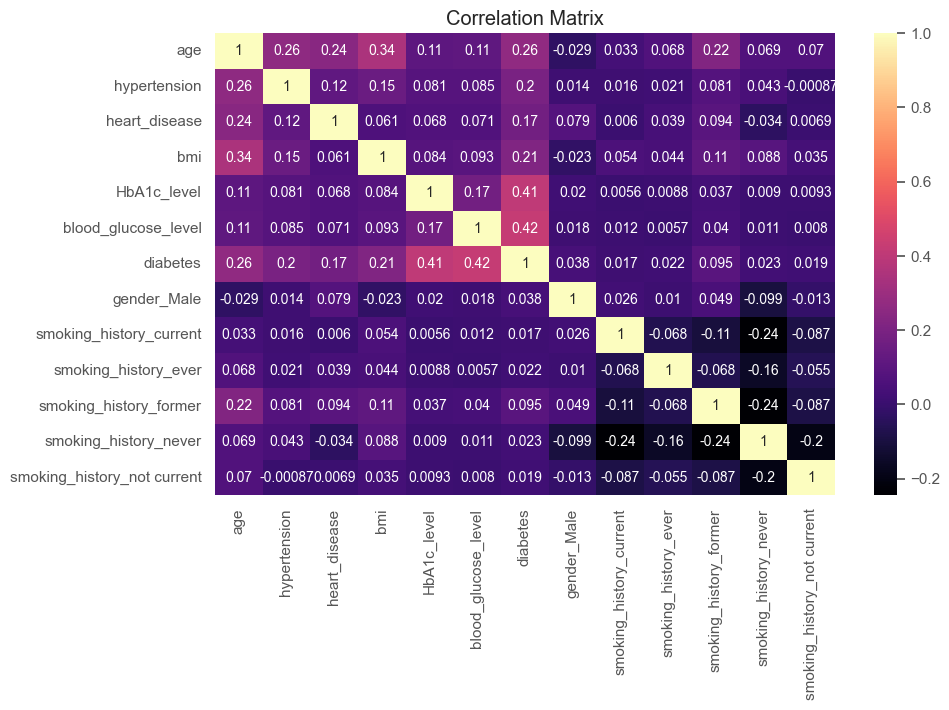

In [179]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(), annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

## Split the data into features and Target variable

In [180]:
X = df_new.drop('diabetes', axis=1)
y = df_new['diabetes']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
numerical_columns = numerical_columns.drop('diabetes')

## Scaling the numerical features

In [183]:
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns]= scaler.transform(X_test[numerical_columns])

In [ ]:
## Writing a resunable function to evaluate the model performance
def evaluate_model(model,pred):
    
    test_acc=accuracy_score(y_test,pred)
    test_prec=precision_score(y_test,pred)
    test_recall=recall_score(y_test,pred)
    test_f1=f1_score(y_test,pred)

    print(f'Testing Accuracy: {test_acc}\n')
    print(f'Precision: {test_prec}\n')
    print(f'Recall: {test_recall}\n')
    print(f'F1 Score: {test_f1}\n')
    print(20*"====+")
    print(f'classification report:\n {classification_report(y_test,pred)}')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Label')  # X-axis: model predictions
    plt.ylabel('Actual Label')  # Y-axis: 
    plt.show()
    print(20*"====+")
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, pred)

    # Plot ROC curve
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC Curve (AUC = {auc_score:.2f})')
    plt.show()

    return {
        'Accuracy': test_acc,
        'Precision': test_prec,
        'Recall': test_recall,
        'F1': test_f1,
        'AUC': auc_score
    }

Model Name: ***Logistic Regression***


Testing Accuracy: 0.9572453968584209

Precision: 0.8576078112286412

Recall: 0.6196355085243974

F1 Score: 0.7194539249146757

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.86      0.62      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.91      0.80      0.85     19226
weighted avg       0.95      0.96      0.95     19226



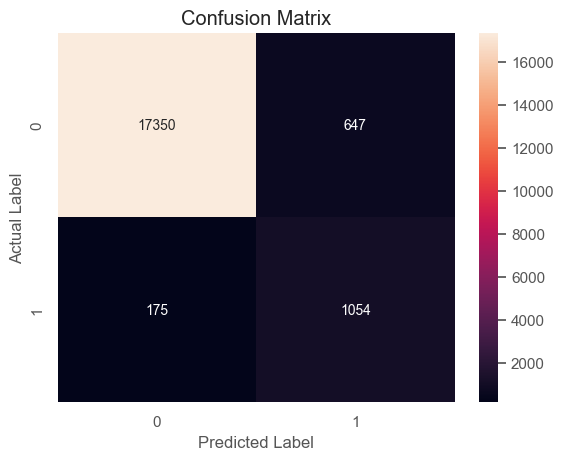

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


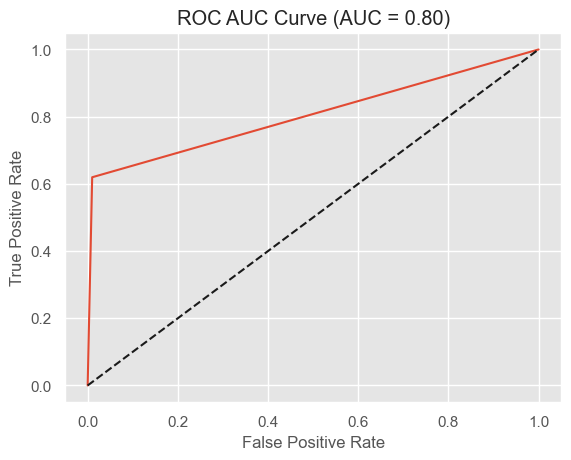

Model Name: ***Random Forest***


Testing Accuracy: 0.9665557058150421

Precision: 0.9408333333333333

Recall: 0.6637272192827748

F1 Score: 0.7783522923129955

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.94      0.66      0.78      1701

    accuracy                           0.97     19226
   macro avg       0.95      0.83      0.88     19226
weighted avg       0.97      0.97      0.96     19226



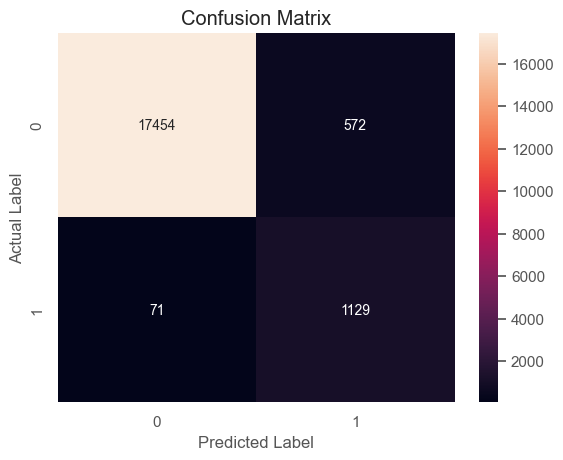

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


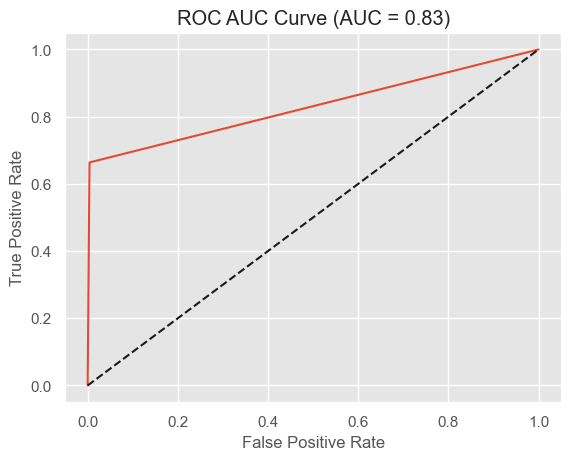

Model Name: ***XGBoost***


Testing Accuracy: 0.9681681056902112

Precision: 0.9518672199170124

Recall: 0.6743092298647855

F1 Score: 0.7894012388162422

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.95      0.67      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.96      0.84      0.89     19226
weighted avg       0.97      0.97      0.97     19226



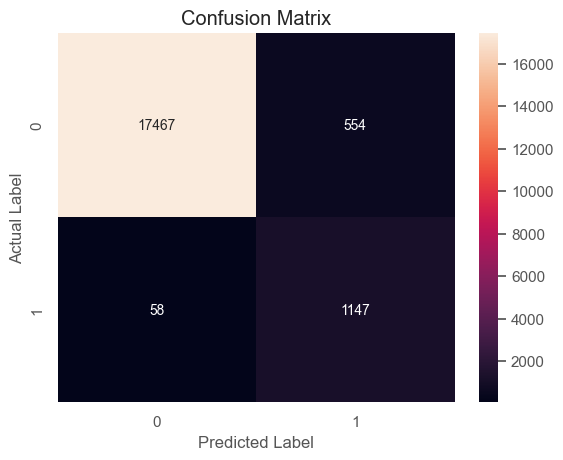

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


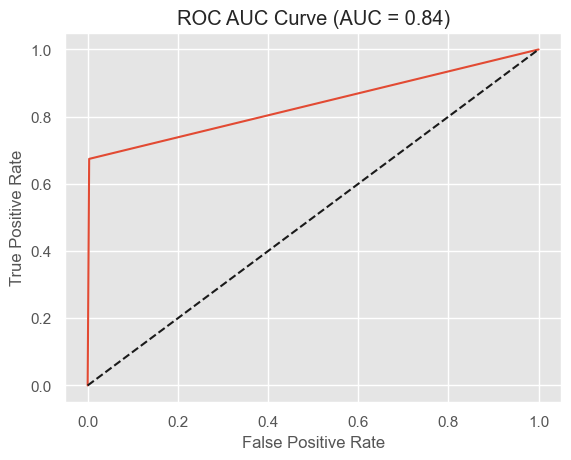

Model Name: ***SVM***


Testing Accuracy: 0.960574222407157

Precision: 0.9738693467336683

Recall: 0.5696649029982364

F1 Score: 0.7188427299703264

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     17525
           1       0.97      0.57      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.97      0.78      0.85     19226
weighted avg       0.96      0.96      0.96     19226



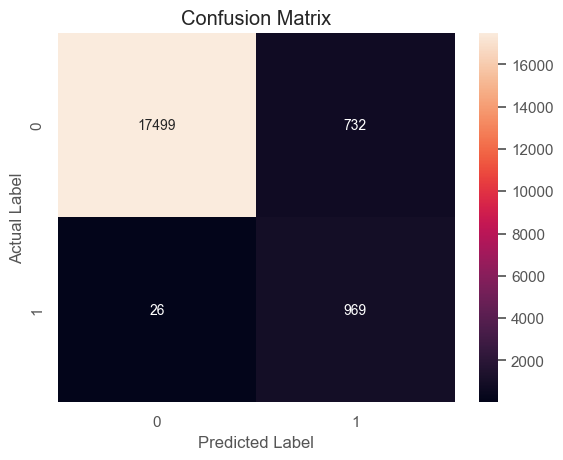

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


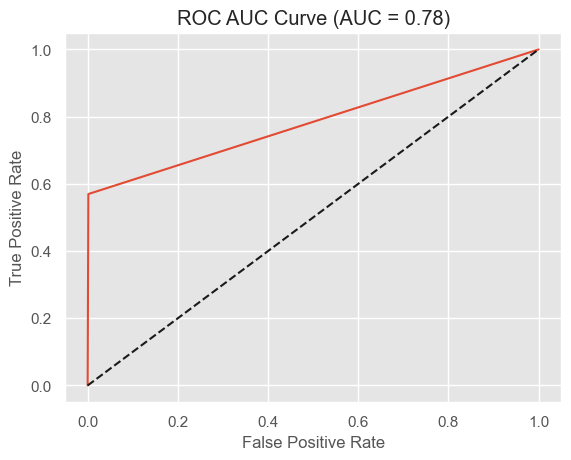

Model Name: ***Decision Tree***


Testing Accuracy: 0.9480391137001977

Precision: 0.6996587030716723

Recall: 0.7231040564373897

F1 Score: 0.7111882046834345

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17525
           1       0.70      0.72      0.71      1701

    accuracy                           0.95     19226
   macro avg       0.84      0.85      0.84     19226
weighted avg       0.95      0.95      0.95     19226



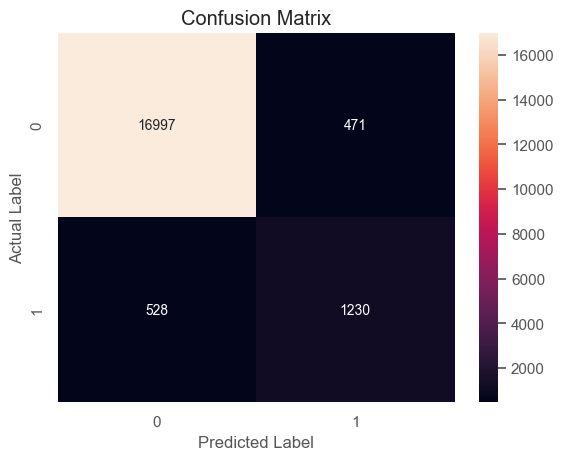

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


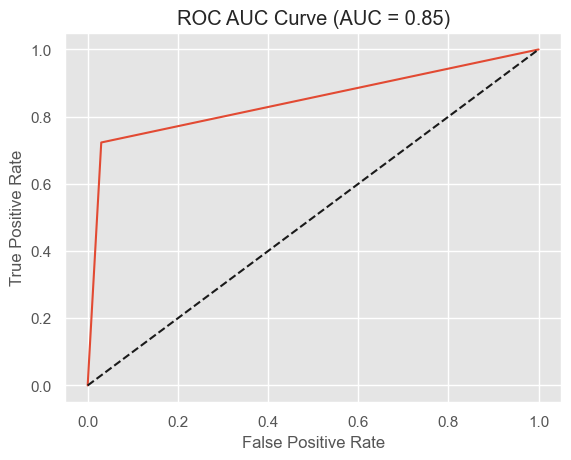

Model Name: ***Gradient Boosting***


Testing Accuracy: 0.9695724539685842

Precision: 0.9911971830985915

Recall: 0.6619635508524397

F1 Score: 0.7937962636587945

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.99      0.66      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



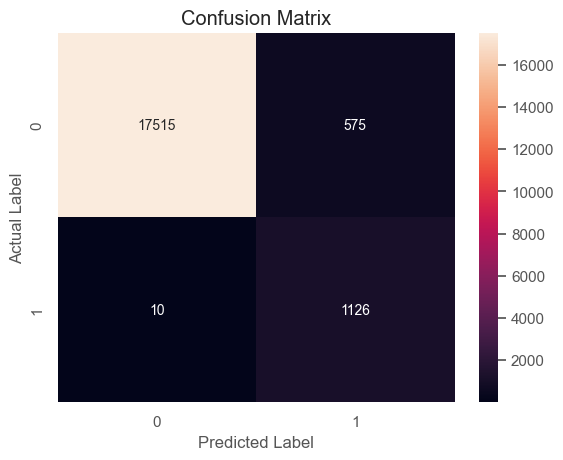

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


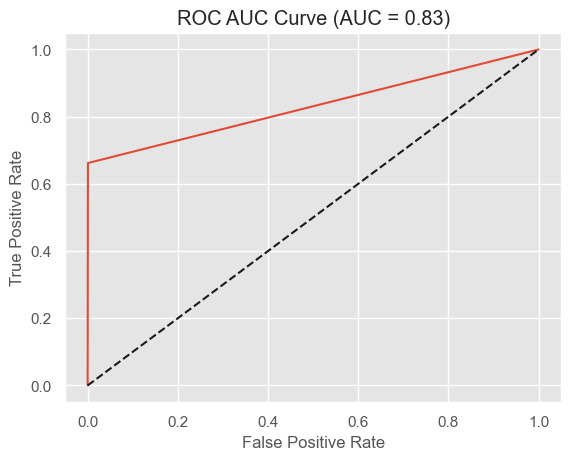

Model Name: ***KNN***


Testing Accuracy: 0.9577655258504109

Precision: 0.8776550552251486

Recall: 0.6072898295120517

F1 Score: 0.7178596247394023

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.88      0.61      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.92      0.80      0.85     19226
weighted avg       0.96      0.96      0.95     19226



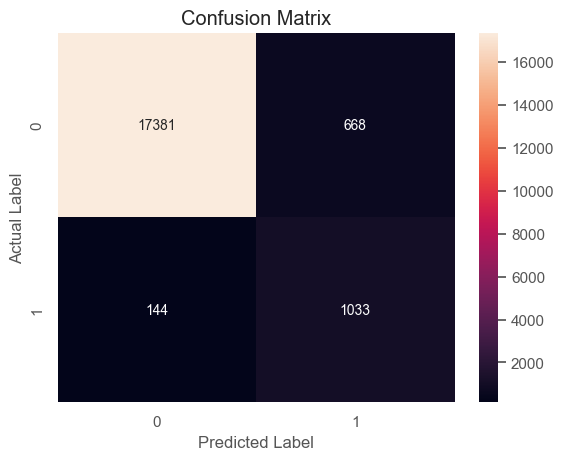

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


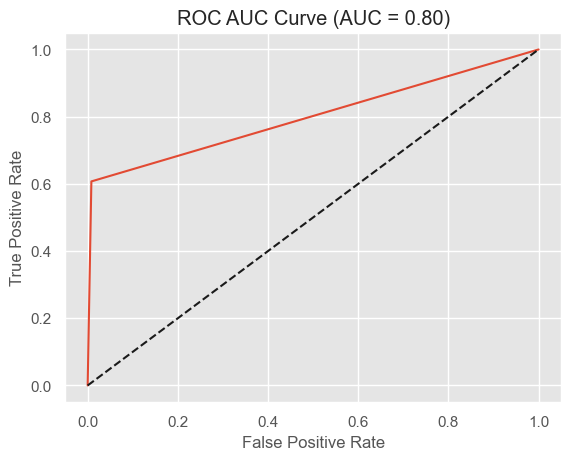


Model Comparison:
                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.957245   0.857608  0.619636  0.719454  0.804825
Random Forest        0.966556   0.940833  0.663727  0.778352  0.829838
XGBoost              0.968168   0.951867  0.674309  0.789401  0.835500
SVM                  0.960574   0.973869  0.569665  0.718843  0.784091
Decision Tree        0.948039   0.699659  0.723104  0.711188  0.846488
Gradient Boosting    0.969572   0.991197  0.661964  0.793796  0.830696
KNN                  0.957766   0.877655  0.607290  0.717860  0.799536

Accuracy Comparison:
Gradient Boosting      0.969572
XGBoost                0.968168
Random Forest          0.966556
SVM                    0.960574
KNN                    0.957766
Logistic Regression    0.957245
Decision Tree          0.948039
Name: Accuracy, dtype: float64


<Figure size 1200x600 with 0 Axes>

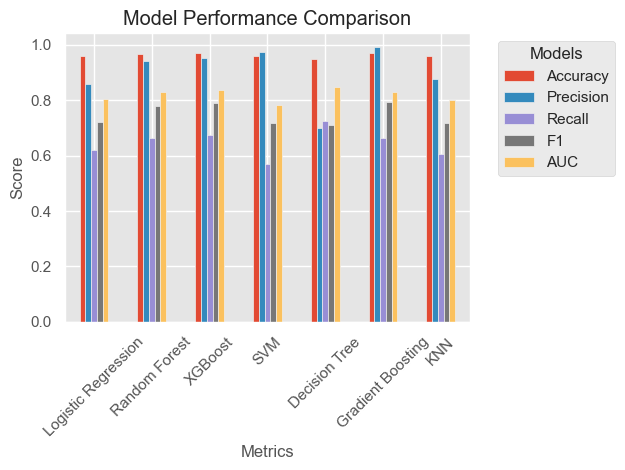

In [185]:
# Store results for different models
model_results = {}

# Evaluate each model
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM' : SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"Model Name: ***{name}***")
    print("\n")
    model_results[name] = evaluate_model(model, pred)

# Create DataFrame from results
results_df = pd.DataFrame(model_results).T  # Transpose to have models as rows
print("\nModel Comparison:")
print(results_df)

# Sort and display accuracy comparison
print("\nAccuracy Comparison:")
print(results_df['Accuracy'].sort_values(ascending=False))

# Visualize comparison
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', rot=45)
plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(title='Models', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Hyperparameter Tunning

In [186]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=4,  eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier()
}

hyperparameters = {
    "Random Forest" :{
        "n_estimators": [50,100, 200],
        "max_depth": [5, 10, None],
    },
    "XGBoost":{
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    },
    "Gradient Boosting": {
            "n_estimators": [50,100, 200],
            "max_depth": [5, 10, None],
    }
}

In [187]:
best_models = {}
for model_name , model in models.items():
    print(f"Tunning {model_name}......")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring = "accuracy")
    grid.fit(X_train, y_train)
    best_models[model_name] =grid.best_estimator_
    print(f"Best parameters for {model_name} : {grid.best_params_}")
    print(f"Best Accuracy for {model_name} : {grid.best_score_: .3f}\n")

Tunning Random Forest......
Best parameters for Random Forest : {'max_depth': 5, 'n_estimators': 50}
Best Accuracy for Random Forest :  0.971

Tunning XGBoost......
Best parameters for XGBoost : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Accuracy for XGBoost :  0.971

Tunning Gradient Boosting......
Best parameters for Gradient Boosting : {'max_depth': 5, 'n_estimators': 50}
Best Accuracy for Gradient Boosting :  0.971



In [188]:
best_models

{'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, ...),
 'Gradient Boosting': GradientBoostingClassifier(max_depth=5, n_estimators=50)}

Choosing Random Forest as the best model with accuracy of 97% among other models

In [189]:
best_models["Random Forest"]

,n_estimators,50
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [190]:
y_test_pred_rf = best_models["Random Forest"].predict(X_test)
y_test_prob_rf = best_models['Random Forest'].predict_proba(X_test)[:, 1]
print(y_test_pred_rf)

[0 0 0 ... 0 0 0]


In [191]:
print(y_test_prob_rf)

[0.0080005  0.0082628  0.01110871 ... 0.01193868 0.08125693 0.01318506]


In [192]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred_rf))
print(f"Precision : ", precision_score(y_test, y_test_pred_rf))
print(f"Recall : ", recall_score(y_test, y_test_pred_rf))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred_rf))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred_rf))
print(f"Classification Report : \n", classification_report(y_test, y_test_pred_rf))

Accuracy :  0.9692603765733901
Precision :  1.0
Recall :  0.6525573192239859
ROC - AUC Score :  0.8262786596119929
Confusion Matrix : 
 [[17525     0]
 [  591  1110]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       1.00      0.65      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



## Save the model and scaler

In [193]:
import joblib
joblib.dump(best_models["Random Forest"], "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train, "X_train_columns.pkl")


['X_train_columns.pkl']

In [194]:
# Load model and scaler
X_train = joblib.load("X_train_columns.pkl")
scaler = joblib.load("scaler.pkl")
loaded_model = joblib.load("best_model.pkl")

In [195]:
print(loaded_model)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)


In [196]:
numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

## Prediction System

In [201]:
def make_prediction(input_data):

    input_df = pd.DataFrame([input_data])

    # Categorical + Numeric features
    categorical_columns = ['gender', 'smoking_history']
    numerical_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

    # One-hot encode
    input_processed = pd.get_dummies(input_df, columns=categorical_columns, drop_first=True)

    # Scale numericals
    input_processed[numerical_columns] = scaler.transform(input_processed[numerical_columns])

    # Add missing training columns
    for col in X_train.columns:        # <-- FIX 1
        if col not in input_processed.columns:
            input_processed[col] = 0

    # Ensure correct order
    input_processed = input_processed[X_train.columns]   # <-- FIX 2

    # Predict
    prediction = loaded_model.predict(input_processed)[0]
    probability = loaded_model.predict_proba(input_processed)[0][1]

    return prediction, probability

In [198]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [199]:
## User input
example_input = {
    'gender': 'Male',
    'age': 62,
    'hypertension': 0,
    'heart_disease': 1,
    'smoking_history': 'current',
    'bmi': 28,
    'HbA1c_level': 8.0,
    'blood_glucose_level': 168
}

In [202]:
## Print the prediction
prediction, prob = make_prediction(example_input)
# Print results
if prediction is not None:
    print(f"Prediction: {'Diabetic' if prediction == 1 else 'Non-Diabetic'}")
    print(f"Probability of being diabetic: {prob:.2%}")

Prediction: Diabetic
Probability of being diabetic: 79.78%
